### Load Data

conda activate preprocess_data

In [1]:
import glob
import sys
import os
import re
import numpy as np
import tifffile as tiff
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import random

folder_path = "/home/durrlab/Desktop/Anthony/training_data_processing/"
sys.path.append(folder_path)
from processing_functions import *


## Break up BIT and MUSE images into training patches. 

### Load Data

In [2]:
root = r'C:\Users\durrlab-asong\OneDrive - Johns Hopkins\MUSE-BIT\20250701_kidney_JH69436370\normal\MUSE-BIT'

### Invert BIT images

In [7]:


invert_images_to_new_folder(os.path.join(root, "train", "normalized_MUSE_Blue_train"), os.path.join(root, "train", "normalized_inverted_MUSE_Blue_train"))
invert_images_to_new_folder(os.path.join(root, "test", "normalized_MUSE_Blue_test"), os.path.join(root, "test", "normalized_inverted_MUSE_Blue_test"))

✅ Saved inverted image: C:\Users\durrlab-asong\OneDrive - Johns Hopkins\MUSE-BIT\20250701_kidney_JH69436370\normal\MUSE-BIT\train\normalized_inverted_MUSE_Blue_train\MUSE_Blue_img=0_patch_X=0_Y=0_Z=1_P=1.tif
✅ Saved inverted image: C:\Users\durrlab-asong\OneDrive - Johns Hopkins\MUSE-BIT\20250701_kidney_JH69436370\normal\MUSE-BIT\train\normalized_inverted_MUSE_Blue_train\MUSE_Blue_img=0_patch_X=0_Y=0_Z=1_P=10.tif
✅ Saved inverted image: C:\Users\durrlab-asong\OneDrive - Johns Hopkins\MUSE-BIT\20250701_kidney_JH69436370\normal\MUSE-BIT\train\normalized_inverted_MUSE_Blue_train\MUSE_Blue_img=0_patch_X=0_Y=0_Z=1_P=11.tif
✅ Saved inverted image: C:\Users\durrlab-asong\OneDrive - Johns Hopkins\MUSE-BIT\20250701_kidney_JH69436370\normal\MUSE-BIT\train\normalized_inverted_MUSE_Blue_train\MUSE_Blue_img=0_patch_X=0_Y=0_Z=1_P=12.tif
✅ Saved inverted image: C:\Users\durrlab-asong\OneDrive - Johns Hopkins\MUSE-BIT\20250701_kidney_JH69436370\normal\MUSE-BIT\train\normalized_inverted_MUSE_Blue_train

### Combine BIT - inverted BIT - BIT for training.

In [8]:
# Train
combine_trios_to_rgb(os.path.join(root, "train", "normalized_inverted_MUSE_Blue_train"), os.path.join(root, "train", "normalized_inverted_MUSE_Blue_train"), os.path.join(root, "train", "normalized_inverted_MUSE_Blue_train"), os.path.join(root ,'train', 'kidney_normal_MUSE_Blue_trainA'))

# Test
combine_trios_to_rgb(os.path.join(root, "test", "normalized_MUSE_Blue_test"), os.path.join(root, "test", "normalized_MUSE_Blue_test"), os.path.join(root, "test", "normalized_MUSE_Blue_test"), os.path.join(root ,'test', 'kidney_normal_MUSE_Blue_testA'))

✅ Found 4200 matched image trios.
✅ Saved 4200 combined RGB images to: C:\Users\durrlab-asong\OneDrive - Johns Hopkins\MUSE-BIT\20250701_kidney_JH69436370\normal\MUSE-BIT\train\kidney_normal_MUSE_Blue_trainA
✅ Found 480 matched image trios.
✅ Saved 480 combined RGB images to: C:\Users\durrlab-asong\OneDrive - Johns Hopkins\MUSE-BIT\20250701_kidney_JH69436370\normal\MUSE-BIT\test\kidney_normal_MUSE_Blue_testA


In [9]:
import pandas as pd
from skimage.io import imread
def plot_image_channels_grid(folder_path, n=5, image_exts={'.png', '.jpg', '.jpeg', '.tif'}):
    """
    Load n images from a folder and plot:
    - Row 1: Original image
    - Row 2-4: Individual channels (0, 1, 2)
    Each image has its mean value shown as title.

    Parameters:
        folder_path (str): Path to folder with images
        n (int): Number of images to load
        image_exts (set): Allowed image extensions
    """
    # List image files
    image_files = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in image_exts]
    image_files = sorted(image_files)[:n]

    if not image_files:
        raise ValueError("No valid image files found in folder.")

    fig, axes = plt.subplots(4, n, figsize=(3*n, 12))
    if n == 1:
        axes = np.expand_dims(axes, axis=1)  # Ensure shape is (4, n)

    for i, fname in enumerate(image_files):
        img_path = os.path.join(folder_path, fname)
        img = imread(img_path)

        if img.ndim == 2:  # grayscale, expand to 3-channel
            img = np.stack([img]*3, axis=-1)
        elif img.shape[-1] < 3:
            raise ValueError(f"Image {fname} has less than 3 channels.")

        # Clip to 3 channels if more
        img = img[:, :, :3]
        img = img.astype(np.float32)

        # Row 0: original image
        mean_val = img.mean()
        axes[0, i].imshow(img / img.max())
        axes[0, i].set_title(f"Mean: {mean_val:.4f}")
        axes[0, i].axis('off')

        # Rows 1-3: individual channels
        for ch in range(3):
            channel = img[:, :, ch]
            ch_mean = channel.mean()
            axes[ch+1, i].imshow(channel, cmap='gray')
            axes[ch+1, i].set_title(f"Ch{ch} Mean: {ch_mean:.4f}")
            axes[ch+1, i].axis('off')

    plt.tight_layout()
    plt.show()

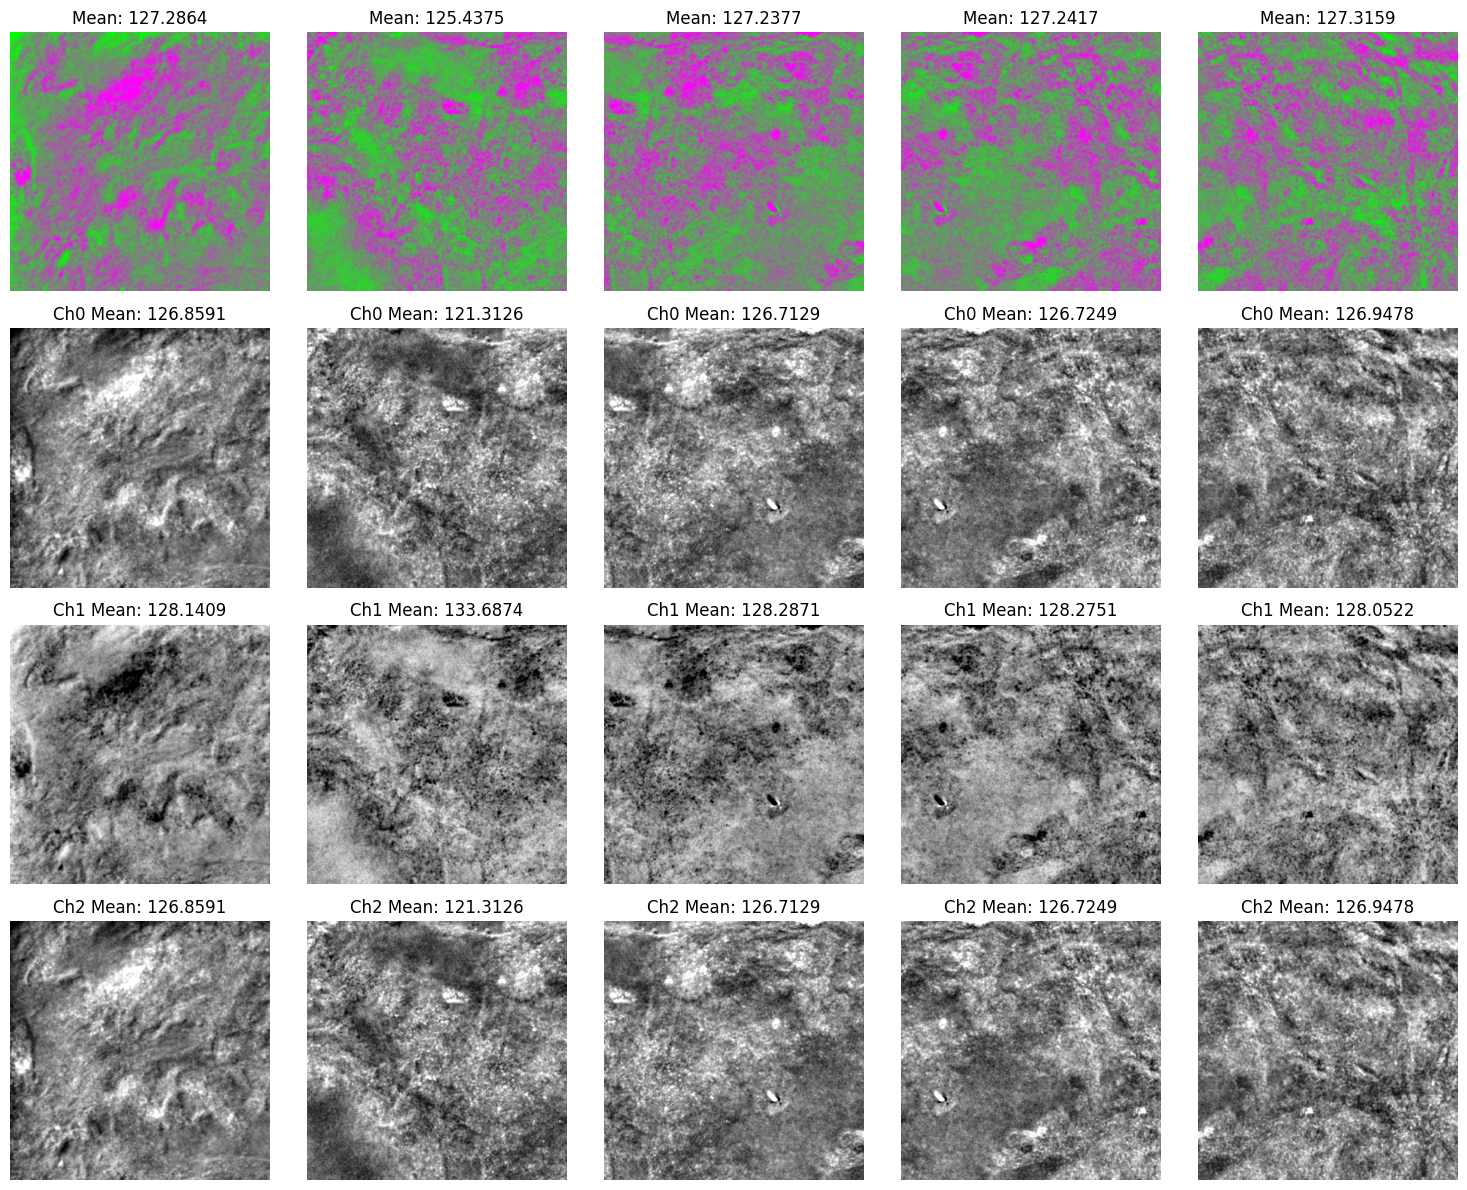

In [10]:
plot_image_channels_grid(os.path.join(root ,'train', 'kidney_normal_BIT-invBIT-BIT_trainA'), n=5)